In [17]:
# Importing packages
import fuzzy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploring the output of fuzzy.nysiis
fuzzy.nysiis
# Testing equivalence of similar sounding words
fuzzy.nysiis('Tufoule') == fuzzy.nysiis('Tufool')


True

In [11]:
# Reading in datasets/nytkids_yearly.csv, which is semicolon delimited.
author_df = pd.read_csv('datasets/nytkids_yearly.csv', delimiter=';')

# Looping through author_df['Author'] to extract the authors first names
first_name = []
for name in author_df['Author']:
    first_name.append(name.split()[0])
# Adding first_name as a column to author_df
author_df ['first_name']= first_name
# Checking out the first few rows of author_df
author_df.head()

,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea


In [12]:
# Looping through author's first names to create the nysiis (fuzzy) equivalent
nysiis_name = []
for first_name in author_df['first_name']:
    tmp = fuzzy.nysiis(first_name)
    nysiis_name.append(tmp.split()[0])
    
    # Adding first_name as a column to author_df
author_df['first_name'] = first_name

# Adding nysiis_name as a column to author_df
author_df['nysiis_name'] = nysiis_name

num_bananas_one = np.unique(author_df['first_name'])
lst1 = list(num_bananas_one)
num_bananas_one = np.asarray(lst1)

num_bananas_two = np.unique(author_df['nysiis_name'])
lst2 = list(num_bananas_two)
num_bananas_two = np.asarray(lst2)


# Printing out the difference between unique firstnames and unique nysiis_names:
print(str("Difference is" + str(num_bananas_one) + "," + str(num_bananas_two) + "."))

Difference is['Lemony'],['ADAN' 'AHNAT' 'AL' 'AN' 'ANDR' 'ANSLY' 'ANTAN' 'ANY' 'ARAN' 'B' 'BAL'
 'BANJANAN' 'BANY' 'BARAC' 'BARAL' 'BARB' 'BARBAR' 'BARCALY' 'BATH'
 'BATRAC' 'BRAD' 'BRAN' 'BRANDAN' 'CAB' 'CABAR' 'CACY' 'CAFAN' 'CALAST'
 'CALS' 'CALY' 'CANBARLY' 'CANT' 'CARALAN' 'CARAN' 'CARL' 'CARLY' 'CARN'
 'CARNAN' 'CARSAN' 'CAT' 'CATARAN' 'CATH' 'CATHY' 'CHR' 'CHRASTAFAR'
 'CLANAD' 'CRAST' 'DABAR' 'DABY' 'DAN' 'DANAC' 'DARAN' 'DAVAD' 'DR' 'ED'
 'EL' 'ELAS' 'EN' 'ENALY' 'ERAC' 'FALAP' 'FARAL' 'FARDANAD' 'GARY' 'GLAN'
 'GRAG' 'GRAN' 'HALARY' 'HALY' 'HARNAN' 'HARV' 'IAN' 'ILASTRATAD' 'J'
 'JACY' 'JADY' 'JAF' 'JAL' 'JALAN' 'JALY' 'JAN' 'JANAFAR' 'JANY' 'JARY'
 'JAVAC' 'JYC' 'L' 'LABAN' 'LACY' 'LAN' 'LANANY' 'LANDSY' 'LAR' 'LARAN'
 'LARY' 'LAS' 'M' 'MAC' 'MACAL' 'MALAL' 'MAN' 'MARAC' 'MARAN' 'MARC'
 'MARGARAT' 'MARY' 'MAT' 'MATAW' 'MC' 'MY' 'NAC' 'NAL' 'NANCY' 'NARTAN'
 'OLAVAR' 'PAP' 'PATAR' 'PATRAC' 'PYTAN' 'QAN' 'R' 'RAB' 'RABAD' 'RAF'
 'RAN' 'RY' 'SAF' 'SAL' 'SAN' 'SANAN' 'SANDR' 'SA

In [13]:
# Reading in datasets/babynames_nysiis.csv, which is semicolon delimited.
babies_df = pd.read_csv('datasets/babynames_nysiis.csv', delimiter = ';')

# Looping through babies_df to and filling up gender
gender = []
for idx, row in babies_df.iterrows():
    if row[1] > row[2]:
        gender.append('F')
    elif row[1] < row[2]:
        gender.append('M')
    elif row[1] == row[2]:
        gender.append('N')
    else:
        gender

# Adding a gender column to babies_df
babies_df['gender'] = pd.Series(gender)

# Printing out the first few rows of babies_df
print(babies_df.head(10))

  babynysiis  perc_female  perc_male gender
0        NaN        62.50      37.50      F
1        RAX        63.64      36.36      F
2       ESAR        44.44      55.56      M
3      DJANG         0.00     100.00      M
4     PARCAL        25.00      75.00      M
5    VALCARY       100.00       0.00      F
6   FRANCASC        63.64      36.36      F
7      CABAT        50.00      50.00      N
8     XANDAR        16.67      83.33      M
9     RACSAN        33.33      66.67      M


In [14]:
# This function returns the location of an element in a_list.
# Where an item does not exist, it returns -1.
def locate_in_list(a_list, element):
    loc_of_name = a_list.index(element) if element in a_list else -1
    return(loc_of_name)

# Looping through author_df['nysiis_name'] and appending the gender of each
# author to author_gender.
author_gender = []
for idx in author_df['nysiis_name']:
   index = locate_in_list(list(babies_df['babynysiis']),idx)
   if(index==-1): 
       author_gender.append('Unknown')
   else: 
       author_gender.append(list(babies_df['gender'])[index])

# Adding author_gender to the author_df
author_df['author_gender'] = author_gender 

# Counting the author's genders
author_df['author_gender'].value_counts()

F          395
M          191
Unknown      9
N            8
Name: author_gender, dtype: int64

In [15]:
# Creating a list of unique years, sorted in ascending order.
years = np.unique(author_df['Year'])
# Initializing lists
males_by_yr = []
females_by_yr = []
unknown_by_yr = []

# Looping through years to find the number of male, female and unknown authors per year
for yy in years:   
   males_by_yr.append(len( author_df[ (author_df['Year']==yy) & (author_df['author_gender']=='M')  ] ))
   females_by_yr.append(len( author_df[ (author_df['Year']==yy) & (author_df['author_gender']=='F')  ] ))
   unknown_by_yr.append(len( author_df[ (author_df['Year']==yy) & (author_df['author_gender']=='Unknown')  ] ))

# Printing out yearly values to examine changes over time
print(males_by_yr)
print(females_by_yr)
print(unknown_by_yr)

[8, 19, 27, 21, 21, 11, 21, 18, 25, 20]
[15, 45, 48, 51, 46, 51, 34, 30, 32, 43]
[1, 3, 0, 1, 0, 2, 1, 0, 0, 1]


Text(0, 0.5, 'Y')

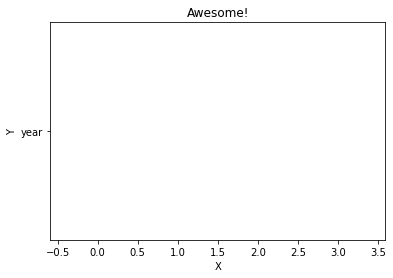

In [18]:
# This makes plots appear in the notebook
%matplotlib inline

# Plotting the bar chart
plt.bar(unknown_by_yr, 'year')

# [OPTIONAL] - Setting a title, and axes labels
plt.title('Awesome!')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

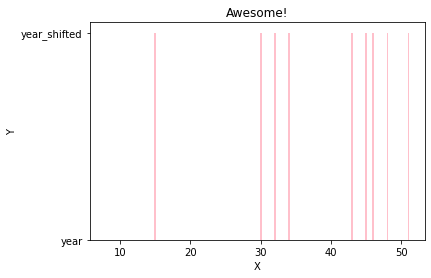

In [19]:
# Creating a new list, where 0.25 is added to each year
years_shifted = [year + 0.25 for year in years]

# Plotting males_by_yr by year
plt.bar(males_by_yr, 'year', width = 0.25, color = 'lightblue')

# Plotting females_by_yr by years_shifted
plt.bar(females_by_yr, 'year_shifted', width = 0.25, color = 'pink')

# [OPTIONAL] - Adding relevant Axes labels and Chart Title
plt.title('Awesome!')
plt.xlabel('X')
plt.ylabel('Y')